In [46]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
stemmer = ps()
from nltk.stem.cistem import Cistem
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
pd.set_option("display.max_rows", None, "display.max_columns", None)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [72]:
unknown_df = pd.read_pickle("./unknown_makers_FINAL.pkl")
full_df = pd.read_pickle("./full_dataset_FINAL.pkl")
known_df = pd.read_pickle("./full_known_dataset_FINAL.pkl")
unknown_cultures = unknown_df[((unknown_df['primaryMaker'].str.match('Unknown artist')) & (unknown_df['culture'].str.match("")) & (unknown_df['place'].str.strip().match("")))]
unknown_cultures.to_pickle("./unknown_cultures_FINAL.pkl")

AttributeError: 'Series' object has no attribute 'match'

In [47]:
#This takes our descriptions and tokenizes them into a list
def tokenize_stem_descriptions(df, column_name):
    tokens = []
    punct_list ={'-',':','&','|', "'s", '...', ',', '!','?', 'hi', 'thi', 'em','039', '#', '”', '+', 'would', '’', 'wa', '(' ,')','[', "'",']', ';', '“', '<', '>','/em', '/', 'p', '/p', '*', '$', '@', '%', '^', '~', '.', '='}
    description_list = []
    for description in df[column_name].dropna():
        description_list.append(description)
    for text in description_list:
        sublist = word_tokenize(text)
        for token in sublist:
            token = token.lower()
            token = stemmer.stem(token)
            if token not in stop_words | punct_list:
                tokens.append(str(token))
    tokens.sort()
    return tokens

In [48]:
#List to dictionary with count frequencies for wordcloud
def list_to_dict(item_list):
    new_dict = {}
    for category in item_list:
        if not category in new_dict.keys():
            new_dict[category] = 1
        else:
            new_dict[category] +=1
    return new_dict

In [49]:
#Making word cloud from a d
def make_cloud(file_name, df, field):
    word_list = tokenize_stem_descriptions(df, field)
    wordle_dict = list_to_dict(word_list)
    wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(wordle_dict)

#plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.figure(figsize=(24,14), dpi=1200)
    plt.show()
    wordcloud.to_file(file_name)

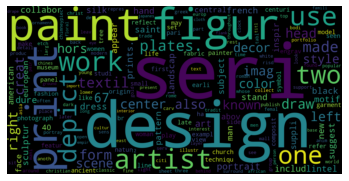

<Figure size 28800x16800 with 0 Axes>

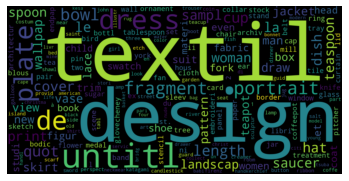

<Figure size 28800x16800 with 0 Axes>

In [50]:
#Full collection description and title
make_cloud('full_collection_description.png', full_df, 'description')
make_cloud('full_collection_title.png', full_df, 'title')


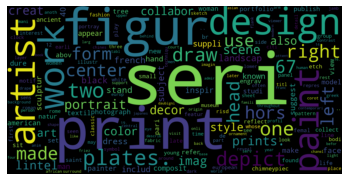

<Figure size 28800x16800 with 0 Axes>

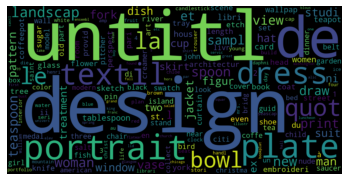

<Figure size 28800x16800 with 0 Axes>

In [51]:
make_cloud('known_maker_description.png', known_df, 'description')
make_cloud('known_maker_title.png', known_df, 'title')

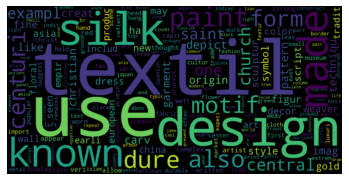

<Figure size 28800x16800 with 0 Axes>

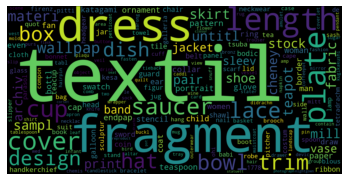

<Figure size 28800x16800 with 0 Axes>

In [52]:
make_cloud('unknown_maker_description.png', unknown_df, 'description')
make_cloud('unknown_maker_title.png', unknown_df, 'title')

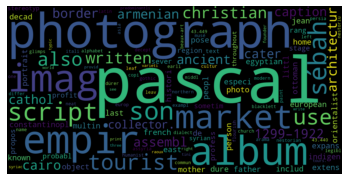

<Figure size 28800x16800 with 0 Axes>

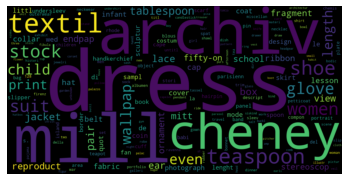

<Figure size 28800x16800 with 0 Axes>

In [74]:
#Unknown cultures and place- suggest incomplete and inconsistent m+ records: DESCRIPTION IS MOSTLY BLANK, title more helpful
make_cloud('unknown_maker_unknown_place.png', unknown_cultures, 'description')
make_cloud('unknown_maker_unknown_place.png', unknown_cultures, 'title')


id collection                                             credit  \
0   1038621                                             Museum Collection   
3   1038636                              Gift of Mrs. Henry Preston Stone   
14  1038786                                         Gift of Cora Ginsburg   
18  1038811                      Gift of the Estate of William E. Brigham   
24  1038906                                         Gift of Marion Pixley   
3    789151                  Gift of the estate of Theodore Francis Green   
15   789276                                Gift of Mrs. Frank A. Wightman   
17   789301                               Gift of Mrs. Walter Howard Levy   
0    822531                                             Museum Collection   
9    822656                           Bequest of Mr. Charles L. Pendleton   
8    801571                                      Museum Works of Art Fund   
15   801751                            Gift of Mrs. Edward V. Famiglietti   
12  1038131                                   Gift of Elinor D. Ingersoll   
1    831576             Gift of the estate of Mrs. Byron Satterlee Hur...   
4    831621                           Gift of Mrs. Elizabeth L. McConnell   
11   831716                   The Gorham Collection. Gift of Textron Inc.   
18   831841                      Gift of the Estate of William E. Brigham   
15   800001                       The Francis Crosby Whitehead Collection   
24   800111                               Gift of Mrs. D. E. Jackson, Jr.   
14  1037476                                                     See Notes   
19   803411                              Gift of Joan Thompson Boghossian   
22   803426                                     Gift of Mrs. Edward Ryder   
9   1037151                                  Gift of Mrs. Harry E. Darrah   
24   821831                                     Gift of Edward Carrington   
1    799241                                             Museum Collection   
16   799461                             Gift of Mrs. Bertram L. Bernhardt   
22   799541                 Gift of the children of Mrs. Lemuel H. Arnold   
23   799551                                        Gift of Rebecca Slater   
2   1036416             Gift of the Society for the Preservation of Ne...   
4   1036431                                  Gift of Mrs. Hans H. Zinsser   
13  1036546                                         Gift of Cora Ginsburg   
20  1036636                                  Gift of Mrs. R. L. Gilpatric   
7    820411                        Gift of Mrs. Thomas Caswell Ellis, Sr.   
8    820426                                     Gift of Mrs. Edward Ryder   
16   802561             Anonymous gift in memory of Christina May Lewi...   
2   1036736                    Gift of the Estate of Eleanor Fayerweather   
3   1036741                    Gift of the Estate of Eleanor Fayerweather   
6    829026             Gift of the Society for the Preservation of Ne...   
4    787856                                  Gift of the Fazzano Brothers   
5    787866             Museum purchase: gift of Mr. and Mrs. Julius B...   
7    787886                                           Gift of William Ely   
18   788091                                 Gift of Mrs. Raymond H. Trott   
8    888681                  Museum Purchase: Abby Rockefeller Mauzé Fund   
14   888741                                  Gift of Margarethe L. Dwight   
15   888756                   The Gorham Collection. Gift of Textron Inc.   
16   888761                   The Gorham Collection. Gift of Textron Inc.   
19   888786                                  Gift of Margarethe L. Dwight   
23   888841                                    Gift of Mrs. Henry Vaughan   
21   804296             Gift of Ostby &amp; Barton in memory of Engleh...   
7    909846                              Gift of Mrs. Walter W. Allendorf   
20   909966                                Georgianna Sayles Aldrich Fund   
13  1